In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#extracting the target column
target = df.pop('label')
target

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [4]:
display(df.head())

print('\n\n  df.describe()')
df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0




  df.describe()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
def preprocess(data):
    
    data = (data/255).astype('float32')   #scaling the data to 0-1 from 0-255
    
    X = data.values.reshape(-1,28,28,1)  # converting 784 columns to 28x28x1 array
    return X
    

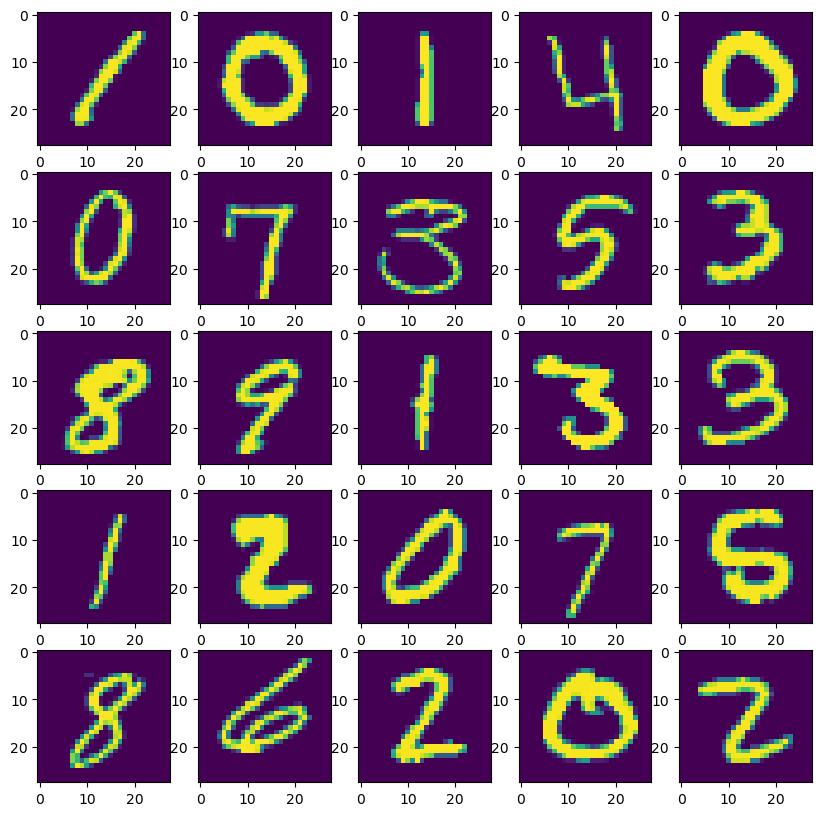

In [6]:
X = preprocess(df)

# plotting some images
fig, axes = plt.subplots(5,5, figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(X[i])

label : 6


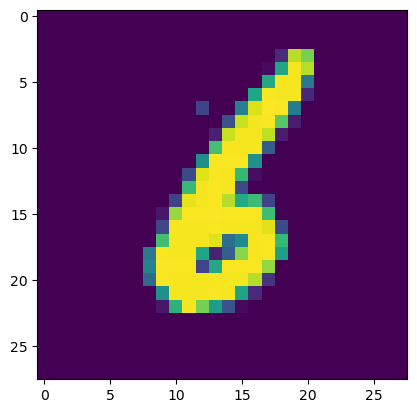

In [7]:
random = np.random.randint(100)

print("label :",target[random])  #checking weather target matches with image array
plt.imshow(X[random])

In [8]:
#Converting target column to Categorical 2D array 
y = keras.utils.to_categorical(target, 10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


In [10]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

In [11]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=100,
          epochs=4,
          validation_split = 0.2)

Epoch 1/4
269/269 [==============================] - 16s 59ms/step - loss: 0.2417 - accuracy: 0.9304 - val_loss: 0.0906 - val_accuracy: 0.9743
Epoch 2/4
269/269 [==============================] - 17s 63ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0662 - val_accuracy: 0.9760
Epoch 3/4
269/269 [==============================] - 16s 59ms/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.0658 - val_accuracy: 0.9793
Epoch 4/4
269/269 [==============================] - 16s 59ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0548 - val_accuracy: 0.9829


In [12]:
def predict(data):
    predictions = model.predict(data)
    predictions = (predictions >= 0.5).astype(int)
    predictions = pd.Series(tf.math.argmax(predictions, axis=1))
    return predictions
    

In [13]:
pred = predict(X_test)
pred

0       4
1       2
2       0
3       7
4       4
       ..
8395    2
8396    1
8397    3
8398    2
8399    7
Length: 8400, dtype: int64

label : 8


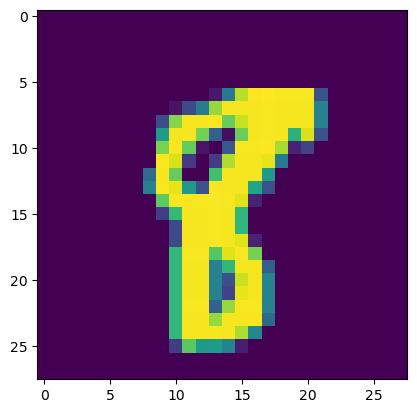

In [14]:
random = np.random.randint(100)

print("label :",pred[random])  #checking weather target matches with image array
plt.imshow(X_test[random])

# Kaggle submission

In [15]:
#final submission
test = pd.read_csv("test.csv")
df_test=preprocess(test)
y_pred = model.predict(df_test)

In [16]:
y_pred = (y_pred >= 0.5).astype(int)
label = tf.math.argmax(y_pred, axis=1)
output = pd.DataFrame({"ImageId":test.index +1, "Label":label})
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [17]:
output.to_csv("submission.csv", index=False)